1. [Target Encoding](#target-encoding)

#### Target Encoding:
- used to transform categorical features into numerical values i.e. probabilities w.r.t target variables
- it allows for data leakage of target information while training
    - performs very good with training data but performs poor with test data
- performed when we have more categories in the categorical feature

##### Classification:

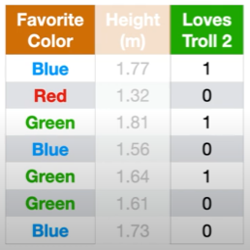

In [ ]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/target_data.png')
new_image = img.resize((250, 250))
display(new_image)

Categories of Favorite Color:
- Blue: (1+0+0)/3 => 0.33
- Red: 0/1 => 0
- Green: (1+1+0)/3 => 0.67 
- the updated table after performing target encoding on the color feature shown below

| Favorite Color | Height (m) | Loves Troll 2 |
|---|---|---|
| 0.33 | 1.77 | 1 |
| 0 | 1.32 | 0 |
| 0.67 | 1.81 | 1 |
| 0.33 | 1.56 | 0 |
| 0.67 | 1.64 | 1 |
| 0.67 | 1.61 | 0 |
| 0.33 | 1.73 | 0 |

##### Regression:

| Favorite Color | Height (m) | Prob of Loves Troll 2 |
|---|---|---|
| Blue | 1.77 | 0.55 |
| Red | 1.32 | 0.88 |
| Green | 1.81 | 0.1 |
| Blue | 1.56 | 0.1 |
| Green | 1.64 | 1 |
| Green | 1.61 | 0.33 |
| Blue | 1.73 | 0.68 |

Categories of Favorite Color:
- Blue: (0.55+0.1+0.68)/3 = 1.33/3 => 0.44
- Red: 1.32/1 => 1.32
- Green: (0.1+1+0.33)/3 = 1.43/3 => 0.48
- the updated table after performing target encoding on the color feature shown below

Overcome Data Leakage for both regression and classification:
- perform cross validation
    - splits data into k folds
        - one of the fold is the holdout set and the remaining is the train set
        - for each holdout set calculate the target encoding w.r.t the train set k-1
- Adding Noise data to target values
- Leave one out encoding
    - calculate the target encoding for its category using all other data points in the training set excluding the current data point itself
- smoothing/regularization
    -  blends both category-specific target statistic with a global statistic
    - Encoded value = ((mean target for category * n) + (global target mean * m))/n+m
        - n => number of instances in category
        - m => smoothing parameter
    - This is called ordered target encoding

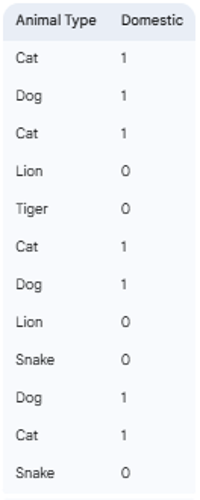

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data.png')
new_image = img.resize((200, 500))
display(new_image)

Overall:
- Total number of animals = 12
- Total number of domestic animals (where "Domestic" is 1) = 6
- Global mean of "Domestic" = 6 / 12 = 0.5

Each Category:
- Cat:
    - Number of Cats = 4
    - Sum of "Domestic" for Cats = 1 + 1 + 1 + 1 = 4
    - Mean "Domestic" for Cats = 4 / 4 = 1.0
- Dog:
    - Number of Dogs = 3
    - Sum of "Domestic" for Dogs = 1 + 1 + 1 = 3
    - Mean "Domestic" for Dogs = 3 / 3 = 1.0
- Lion:
    - Number of Lions = 2
    - Sum of "Domestic" for Lions = 0 + 0 = 0
    - Mean "Domestic" for Lions = 0 / 2 = 0.0
- Tiger:
    - Number of Tigers = 1
    - Sum of "Domestic" for Tigers = 0
    - Mean "Domestic" for Tigers = 0 / 1 = 0.0
- Snake:
    - Number of Snakes = 2
    - Sum of "Domestic" for Snakes = 0 + 0 = 0
    - Mean "Domestic" for Snakes = 0 / 2 = 0.0
    
Applying the Smoothing Formula to Calculate the Encoded Value for Each Animal Type:

- Cat:
    - Smoothed Encoded Value = (4 * 1.0 + 2 * 0.5) / (4 + 2) = (4 + 1) / 6 = 5 / 6 ≈ 0.833
- Dog:
    - Smoothed Encoded Value = (3 * 1.0 + 2 * 0.5) / (3 + 2) = (3 + 1) / 5 = 4 / 5 = 0.8
- Lion:
    - Smoothed Encoded Value = (2 * 0.0 + 2 * 0.5) / (2 + 2) = (0 + 1) / 4 = 1 / 4 = 0.25
- Tiger:
    - Smoothed Encoded Value = (1 * 0.0 + 2 * 0.5) / (1 + 2) = (0 + 1) / 3 = 1 / 3 ≈ 0.333
- Snake:
    - Smoothed Encoded Value = (2 * 0.0 + 2 * 0.5) / (2 + 2) = (0 + 1) / 4 = 1 / 4 = 0.25

- mathematically, the loss function for xgboost regression as shown below

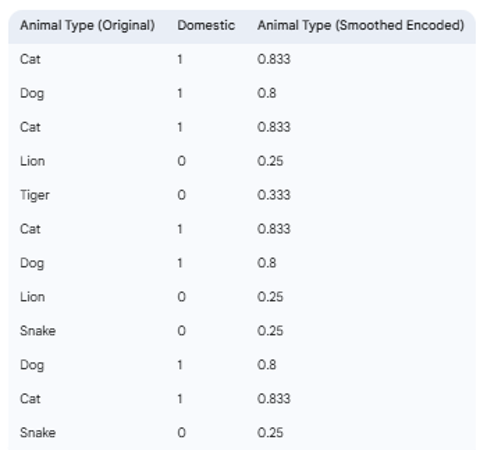

In [12]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/encoded_value.png')
new_image = img.resize((480, 450))
display(new_image)